In [1]:
import pandas as pd

df = pd.read_csv('retantion_rate.csv',sep=';')
df.head()

,Week,Wekley_revenue_23,Wekley_revenue_24,Avg_Cum_23,Avg_Cum_24
0,1,145000,100000,145000,100000
1,2,142300,99491,141811,99342
2,3,141322,99194,141322,99194
3,4,138322,100012,139822,99603
4,5,137193,100342,138946,99849


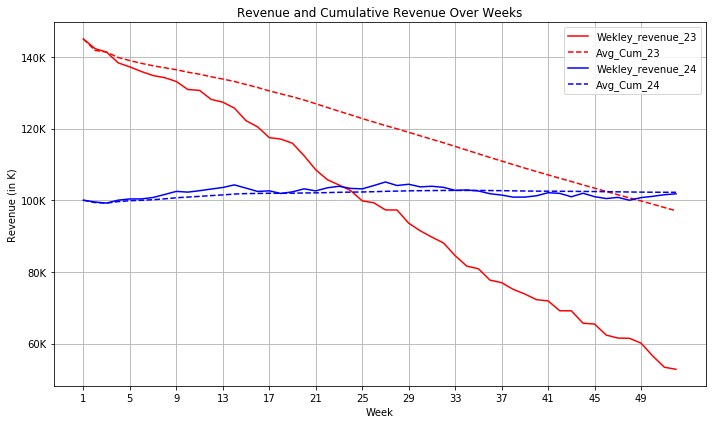

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def divide_by_1000(value, pos):
    return f'{value / 1000:.0f}K'

week = df['Week']
revenue_23 = df['Wekley_revenue_23']
revenue_24 = df['Wekley_revenue_24']
cum_23 = df['Avg_Cum_23']
cum_24 = df['Avg_Cum_24']

plt.figure(figsize=(10, 6))

plt.plot(week, revenue_23, color='red', label='Wekley_revenue_23')
plt.plot(week, cum_23, color='red', linestyle='--', label='Avg_Cum_23')

plt.plot(week, revenue_24, color='blue', label='Wekley_revenue_24')
plt.plot(week, cum_24, color='blue', linestyle='--', label='Avg_Cum_24')

plt.title('Revenue and Cumulative Revenue Over Weeks')
plt.xlabel('Week')
plt.ylabel('Revenue (in K)')
plt.grid(True)
plt.legend()
plt.xticks(range(min(week), max(week) + 1, 4))  
plt.gca().yaxis.set_major_formatter(FuncFormatter(divide_by_1000))  
plt.tight_layout()

plt.show()



In [10]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(df['Wekley_revenue_23'], df['Wekley_revenue_24'])

alpha = 0.05
if p_value < alpha:
    print("'Wekley_revenue_23' and 'Wekley_revenue_24' means are statistically different (p < 0.05)")
else:
    print("'Wekley_revenue_23' and 'Wekley_revenue_24' means are not statistically different (p >= 0.05)")


'Wekley_revenue_23' and 'Wekley_revenue_24' means are not statistically different (p >= 0.05)


In [11]:
from scipy.stats import levene, shapiro

levene_statistic, levene_p_value = levene(df['Wekley_revenue_23'], df['Wekley_revenue_24'])

shapiro_statistic_23, shapiro_p_value_23 = shapiro(df['Wekley_revenue_23'])
shapiro_statistic_24, shapiro_p_value_24 = shapiro(df['Wekley_revenue_24'])

if levene_p_value < 0.05:
    print("The variances are not homogeneous (p < 0.05)")
else:
    print("The variances are homogeneous (p >= 0.05)")

if shapiro_p_value_23 < 0.05 or shapiro_p_value_24 < 0.05:
    print("At least one of the distributions is not normal (p < 0.05)")
else:
    print("Both distributions are normal (p >= 0.05)")


The variances are not homogeneous (p < 0.05)
At least one of the distributions is not normal (p < 0.05)


In [13]:
from scipy.stats import mannwhitneyu

u_statistic, u_p_value = mannwhitneyu(df['Wekley_revenue_23'], df['Wekley_revenue_24'])

if u_p_value < 0.05:
    print("The two variables have significantly different means (p < 0.05)")
else:
    print("The two variables do not have significantly different means (p >= 0.05)")



The two variables do not have significantly different means (p >= 0.05)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_with_normal_distribution(data1, data2):
   
    plt.figure(figsize=(10, 6))

    sns.distplot(data1, color='blue', label='Data 1', kde=True, fit=None)
    mean_data1 = np.mean(data1)
    median_data1 = np.median(data1)
    plt.axvline(x=mean_data1, color='blue', linestyle='--', label=f'Data 1 Mean: {mean_data1:.2f}')
    plt.axvline(x=median_data1, color='blue', linestyle='-', label=f'Data 1 Median: {median_data1:.2f}')

    sns.distplot(data2, color='lime', label='Data 2', kde=True, fit=None)
    mean_data2 = np.mean(data2)
    median_data2 = np.median(data2)
    plt.axvline(x=mean_data2, color='lime', linestyle='--', label=f'Data 2 Mean: {mean_data2:.2f}')
    plt.axvline(x=median_data2, color='lime', linestyle='-', label=f'Data 2 Median: {median_data2:.2f}')

    plt.xlim(50000, 150000)

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Overlaid Histogram with Normal Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


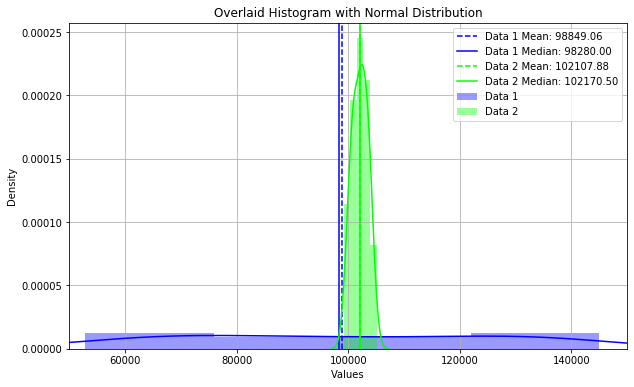

In [17]:
plot_histogram_with_normal_distribution(df['Wekley_revenue_23'], df['Wekley_revenue_24'])